#Tanggerang House Pricing Prediction

##import library

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import re

## **1 .read dataset**

In [ ]:
data = pd.read_csv('https://github.com/Amerta1090/Tangerang-House-Pricing/raw/371c9ef4dfc248afc4a06f1e112f469cc2b85b55/rumahTangsel.csv', encoding='latin1')

In [ ]:
data.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²


## **2. Detail dan tipe dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29420 entries, 0 to 29419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nav-link href        29420 non-null  object 
 1   listing-location     29420 non-null  object 
 2   price                29420 non-null  object 
 3   bed                  29282 non-null  float64
 4   bath                 29215 non-null  float64
 5   listing-floorarea    29420 non-null  object 
 6   listing-floorarea 2  29383 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.6+ MB


In [ ]:
print("data columns : ", data.columns)

data columns :  Index(['nav-link href', 'listing-location', 'price', 'bed', 'bath',
       'listing-floorarea', 'listing-floorarea 2'],
      dtype='object')


In [ ]:
print("data shape : ", data.shape)

data shape :  (29420, 7)


## **3. EDA (Expoloratory Data Analysis)**

###Handling Missing Value

In [ ]:
data.isnull().sum()

nav-link href            0
listing-location         0
price                    0
bed                    138
bath                   205
listing-floorarea        0
listing-floorarea 2     37
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

nav-link href          0
listing-location       0
price                  0
bed                    0
bath                   0
listing-floorarea      0
listing-floorarea 2    0
dtype: int64

###Handling Duplicated

In [ ]:
duplikasi = data.duplicated().sum()
print("Jumlah Duplikasi Data :", duplikasi)

Jumlah Duplikasi Data : 5196


In [ ]:
data = data.drop_duplicates()

In [ ]:
##setelah di-handling duplikasi
duplikasi = data.duplicated().sum()
print("Jumlah Duplikasi Data :", duplikasi)

Jumlah Duplikasi Data : 0


In [ ]:
data.shape

(23984, 7)



```
# This is formatted as code
```

###Handling Outlier

In [ ]:
data.drop(columns=['nav-link href'], inplace=True)
data.sample(10)

<ipython-input-75-5bcbef046fc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['nav-link href'], inplace=True)


,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
10914,"Gading Serpong, Tangerang Selatan, Banten","3,8 M",4.0,3.0,147 m²,Rp 31.666.667 per m²
27672,"BSD, Tangerang Selatan, Banten","5,8 M",4.0,4.0,177 m²,Rp 40.277.778 per m²
8263,"Gading Serpong, Tangerang Selatan, Banten","2,8 M",4.0,3.0,150 m²,Rp 13.397.129 per m²
26358,"Discovery, Bintaro, Tangerang Selatan, Banten","4,2 M",5.0,4.0,161 m²,Rp 29.166.667 per m²
13646,"Serpong Park Tangerang Selatan, Serpong Utara,...","1,6 M",5.0,4.0,150 m²,Rp 12.800.000 per m²
22772,"Gading Serpong, Tangerang Selatan, Banten","1,3 M",3.0,2.0,60 m²,Rp 24.528.302 per m²
21298,"Bintaro Sektor 7, Bintaro, Tangerang Selatan, ...","8,4 M",4.0,3.0,300 m²,Rp 24.705.882 per m²
15481,"BSD, Tangerang Selatan, Banten","4,1 M",4.0,4.0,300 m²,Rp 17.446.809 per m²
16232,"Bintaro, Tangerang Selatan, Banten","3,95 M",4.0,3.0,330 m²,Rp 35.909.091 per m²
2778,"Bintaro Jaya, Bintaro, Tangerang Selatan, Banten","1,475 M",2.0,2.0,41 m²,Rp 20.486.111 per m²


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23984 entries, 0 to 29419
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing-location     23984 non-null  object 
 1   price                23984 non-null  object 
 2   bed                  23984 non-null  float64
 3   bath                 23984 non-null  float64
 4   listing-floorarea    23984 non-null  object 
 5   listing-floorarea 2  23984 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.3+ MB


In [ ]:
def convert_to_numeric(price_str):
    price_str = price_str.lower().replace(' ', '')
    if 'm' in price_str:
        return float(price_str.replace('m', '').replace(',', '.')) * 1_000_000_000
    elif 'jt' in price_str:
        return float(price_str.replace('jt', '').replace(',', '.')) * 1_000_000
    elif 'rb' in price_str:
        return float(price_str.replace('rb', '').replace(',', '.')) * 1_000
    else:
        return float(price_str.replace(',', '.'))


In [ ]:
data['price'] = data['price'].apply(convert_to_numeric)

In [ ]:
data.sample(10)

,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
15269,"Bintaro Sektor 9, Pondok Aren, Tangerang Selat...",2.500000e+09,3.0,3.0,93 m²,Rp 23.148.148 per m²
28757,"Green Serpong Bintaro, Serpong, Tangerang Sela...",1.000000e+09,3.0,3.0,64 m²,Rp 13.888.889 per m²
6937,"JL. Lengkong Wetan, Bintaro, Tangerang Selatan...",6.000000e+08,3.0,2.0,50 m²,Rp 10.000.000 per m²
29013,The Green Cluster Bellagio Cilenggang Kec Serp...,7.600000e+09,6.0,4.0,450 m²,Rp 20.266.667 per m²
23614,"BSD, Tangerang Selatan, Banten",1.150000e+10,9.0,6.0,653 m²,Rp 26.995.305 per m²
13961,"Jl. Raya Cireundeu, Ciputat, Tangerang Selatan...",3.150000e+09,3.0,3.0,240 m²,Rp 25.609.756 per m²
27323,"Cirendeu, Ciputat Timur, Tangerang Selatan, Ba...",1.700000e+09,2.0,1.0,62 m²,Rp 16.346.154 per m²
16868,"Ciputat, Tangerang Selatan, Banten",4.000000e+09,4.0,2.0,200 m²,Rp 9.324.009 per m²
11233,"Gading Serpong, Tangerang Selatan, Banten",3.900000e+09,3.0,3.0,140 m²,Rp 28.676.471 per m²
98,"Ciputat Timur, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,200 m²,Rp 18.965.517 per m²


In [ ]:
data.rename(columns={'listing-floorarea': 'listing-floorarea (m²)'}, inplace=True)
data.sample()

,listing-location,price,bed,bath,listing-floorarea (m²),listing-floorarea 2
28965,"Welton Hiera, BSD, Tangerang Selatan, Banten",2.400000e+09,2.0,2.0,118 m²,Rp 24.489.796 per m²


In [ ]:
data['listing-floorarea (m²)'] = data['listing-floorarea (m²)'].str.replace(' m²', '').astype(float)

In [ ]:
data.sample(10)

,listing-location,price,bed,bath,listing-floorarea (m²),listing-floorarea 2
25625,"BSD, Tangerang Selatan, Banten",2.500000e+09,5.0,3.0,170.0,Rp 11.792.453 per m²
8529,"Gading Serpong, Tangerang Selatan, Banten",1.400000e+09,2.0,2.0,44.0,Rp 19.444.444 per m²
22476,Jalan Discovery Park Bintaro Pd Aren Tangerang...,4.200000e+09,5.0,4.0,220.0,Rp 28.000.000 per m²
7139,"Bintaro, Tangerang Selatan, Banten",4.918000e+09,4.0,4.0,167.0,Rp 36.429.630 per m²
22155,"Bintaro 3 A, Bintaro, Tangerang Selatan, Banten",7.200000e+09,7.0,5.0,350.0,Rp 24.406.780 per m²
14569,"Kucica, Bintaro, Tangerang Selatan, Banten",2.950000e+09,4.0,3.0,150.0,Rp 20.486.111 per m²
26832,"Bintaro Jaya Sektor 5, Bintaro, Tangerang Sela...",8.200000e+09,7.0,6.0,500.0,Rp 12.330.827 per m²
25675,"jalan parakan pamulang dua, Pamulang, Tangeran...",5.500000e+08,2.0,2.0,36.0,Rp 10.576.923 per m²
20368,"Ciputat, Tangerang Selatan, Banten",2.500000e+09,3.0,4.0,150.0,Rp 21.008.403 per m²
13048,"Jl. Raya Ceger, Pondok Aren, Tangerang Selatan...",1.290000e+09,5.0,2.0,120.0,Rp 8.600.000 per m²


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23984 entries, 0 to 29419
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing-location        23984 non-null  object 
 1   price                   23984 non-null  float64
 2   bed                     23984 non-null  float64
 3   bath                    23984 non-null  float64
 4   listing-floorarea (m²)  23984 non-null  float64
 5   listing-floorarea 2     23984 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.3+ MB


In [ ]:
# Definisi fungsi untuk membersihkan kolom
def hapus_karakter(text):
    return re.sub(r'\D', '', text)

# Terapkan fungsi ke setiap elemen dalam kolom 'listing-floorarea 2'
data['listing-floorarea 2'] = data['listing-floorarea 2'].apply(hapus_karakter)

# Tampilkan hasil
print(data)

                                listing-location         price  bed  bath  \
0      Gading Serpong, Tangerang Selatan, Banten  6.900000e+09  5.0   5.0   
1      Gading Serpong, Tangerang Selatan, Banten  4.500000e+09  3.0   3.0   
2      Gading Serpong, Tangerang Selatan, Banten  3.950000e+09  3.0   3.0   
3      Gading Serpong, Tangerang Selatan, Banten  3.300000e+09  4.0   3.0   
4      Gading Serpong, Tangerang Selatan, Banten  3.500000e+09  3.0   2.0   
...                                          ...           ...  ...   ...   
29415         Bintaro, Tangerang Selatan, Banten  3.300000e+09  3.0   3.0   
29416         Bintaro, Tangerang Selatan, Banten  4.000000e+09  8.0   4.0   
29417         Bintaro, Tangerang Selatan, Banten  2.200000e+09  3.0   2.0   
29418         Bintaro, Tangerang Selatan, Banten  1.950000e+09  3.0   2.0   
29419         Bintaro, Tangerang Selatan, Banten  5.500000e+09  4.0   3.0   

       listing-floorarea (m²) listing-floorarea 2  
0                      

In [ ]:
data['listing-floorarea 2'] = data['listing-floorarea 2'].astype(float)

In [ ]:
data.rename(columns={'listing-floorarea 2': 'harga listing-floorarea per m²'}, inplace=True)

In [ ]:
data.sample(10)

,listing-location,price,bed,bath,listing-floorarea (m²),harga listing-floorarea per m²
1796,"Bulak Wangi, Ciputat, Tangerang Selatan, Banten",1.400000e+09,3.0,2.0,73.0,17500000.0
17422,"Ciputat Timur, Tangerang Selatan, Banten",1.580000e+09,3.0,2.0,132.0,26333333.0
26994,"Serpong, Tangerang Selatan, Banten",9.500000e+08,3.0,3.0,55.0,23750000.0
2577,"Bintaro, Tangerang Selatan, Banten",2.800000e+09,5.0,4.0,135.0,23333333.0
19739,"Jalan raya Pamulang.tangerang selatan, Pamulan...",8.750000e+08,3.0,2.0,65.0,11217949.0
1776,"Kebayoran Harmony, Bintaro, Tangerang Selatan,...",2.300000e+09,3.0,3.0,80.0,31944444.0
25505,"Gading Serpong, Gading Serpong, Tangerang Sela...",1.650000e+09,3.0,2.0,104.0,12890625.0
10290,"BSD, Tangerang Selatan, Banten",3.500000e+09,4.0,4.0,130.0,21875000.0
14567,"Jl Bintaro Jaya Sektor 9 -Taman Puri Bintaro, ...",7.800000e+09,6.0,6.0,970.0,13287905.0
8732,"Bintaro, Tangerang Selatan, Banten",4.700000e+09,5.0,4.0,154.0,23979592.0


In [ ]:
data = data.drop(columns=['listing-location'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23984 entries, 0 to 29419
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           23984 non-null  float64
 1   bed                             23984 non-null  float64
 2   bath                            23984 non-null  float64
 3   listing-floorarea (m²)          23984 non-null  float64
 4   harga listing-floorarea per m²  23984 non-null  float64
dtypes: float64(5)
memory usage: 1.1 MB


In [ ]:
data.sample(10)

,price,bed,bath,listing-floorarea (m²),harga listing-floorarea per m²
26834,1.050000e+10,7.0,6.0,740.0,14522822.0
25944,1.600000e+09,3.0,2.0,77.0,22857143.0
27296,9.650000e+09,4.0,4.0,426.0,11584634.0
14867,3.200000e+09,4.0,4.0,220.0,13913043.0
28488,6.000000e+09,6.0,4.0,220.0,21978022.0
2051,1.580000e+09,3.0,2.0,132.0,26333333.0
28715,1.750000e+09,4.0,4.0,95.0,20588235.0
21047,6.500000e+09,4.0,3.0,360.0,6996771.0
6415,8.390000e+08,2.0,2.0,41.0,26218750.0
14048,1.800000e+09,4.0,4.0,150.0,18367347.0


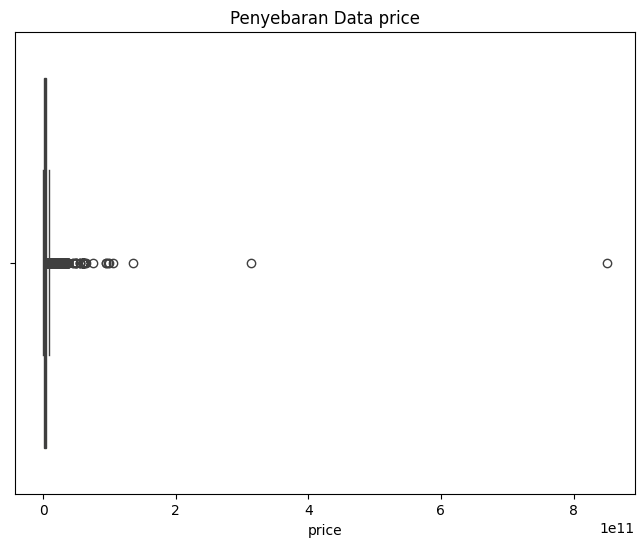

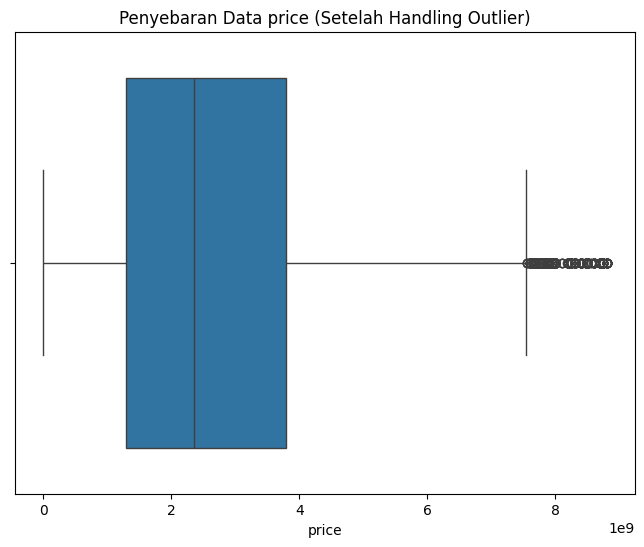

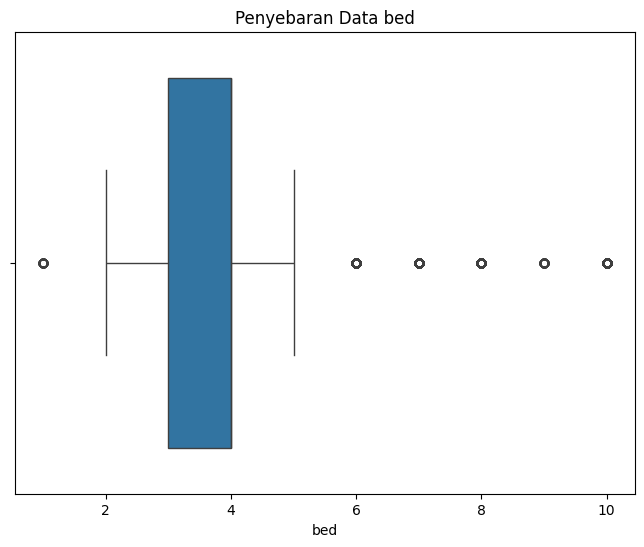

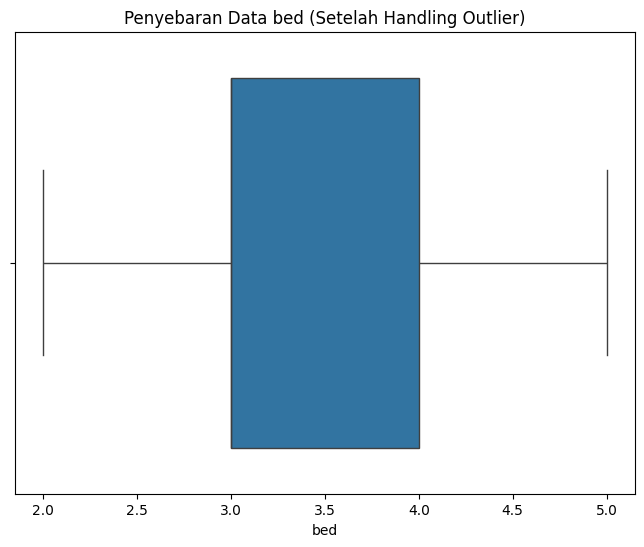

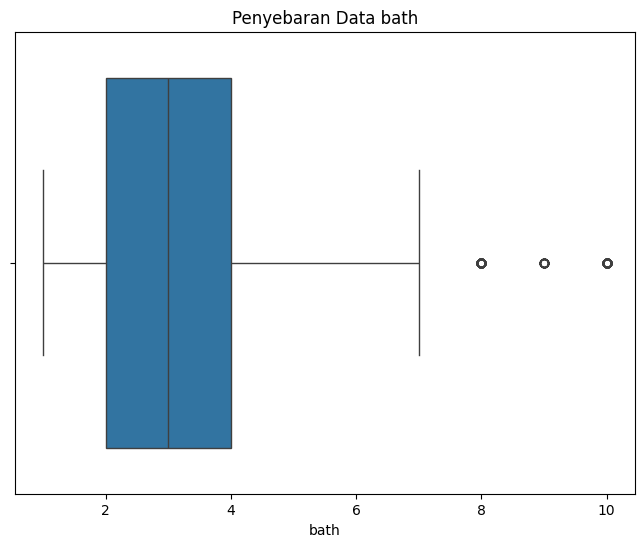

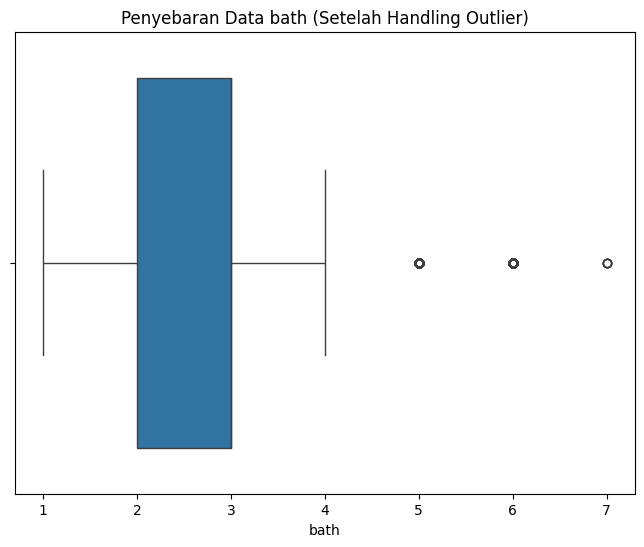

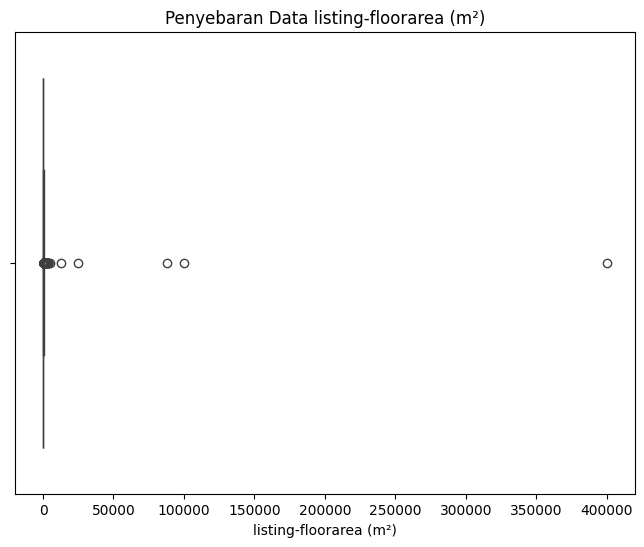

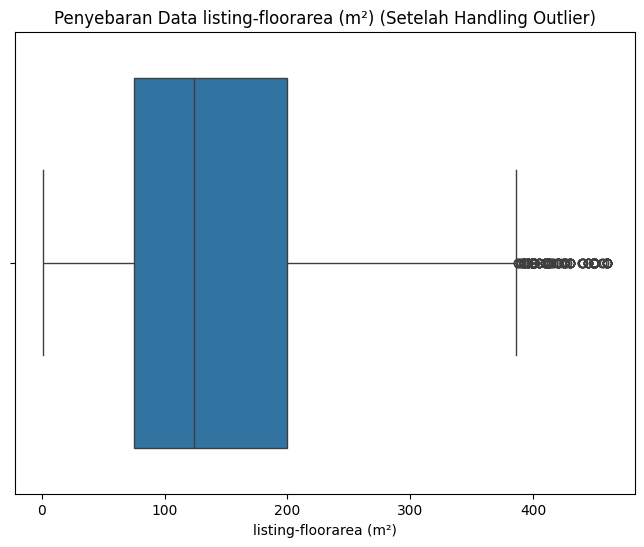

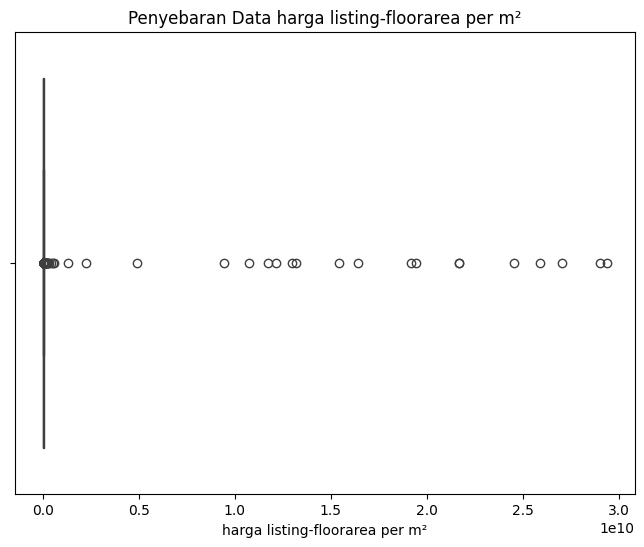

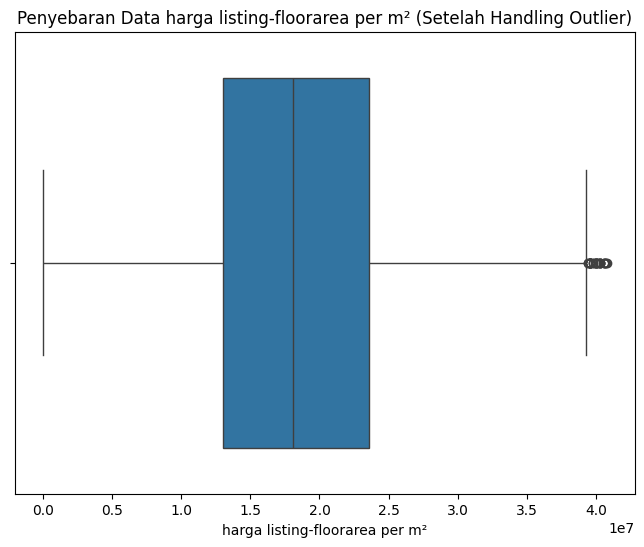

              price  bed  bath  listing-floorarea (m²)  \
0      6.900000e+09  5.0   5.0                   420.0   
1      4.500000e+09  3.0   3.0                   190.0   
2      3.950000e+09  3.0   3.0                   132.0   
3      3.300000e+09  4.0   3.0                   220.0   
4      3.500000e+09  3.0   2.0                   180.0   
...             ...  ...   ...                     ...   
29414  1.300000e+09  3.0   2.0                    65.0   
29415  3.300000e+09  3.0   3.0                   300.0   
29417  2.200000e+09  3.0   2.0                   160.0   
29418  1.950000e+09  3.0   2.0                   120.0   
29419  5.500000e+09  4.0   3.0                   200.0   

       harga listing-floorarea per m²  
0                          20720721.0  
1                          12747875.0  
2                          30859375.0  
3                          18333333.0  
4                          27777778.0  
...                               ...  
29414                  

In [ ]:
# Daftar kolom yang akan diolah
kolom_kolom = ['price', 'bed', 'bath', 'listing-floorarea (m²)', 'harga listing-floorarea per m²']

# Salinan data untuk difilter
data_filtered = data.copy()

for kolom in kolom_kolom:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[kolom], orient='h')
    plt.title('Penyebaran Data {}'.format(kolom))
    plt.xlabel(kolom)
    plt.show()

    # Handling outlier menggunakan metode IQR
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering data berdasarkan IQR
    data_filtered = data_filtered[(data_filtered[kolom] >= Q1 - 1.5 * IQR) & (data_filtered[kolom] <= Q3 + 1.5 * IQR)]

    # Menampilkan boxplot setelah handling outlier
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_filtered[kolom], orient='h')
    plt.title('Penyebaran Data {} (Setelah Handling Outlier)'.format(kolom))
    plt.xlabel(kolom)
    plt.show()

# Menampilkan data setelah handling outlier untuk semua kolom
print(data_filtered)

## **4. Descriptive Statistik**

In [ ]:
# Menampilkan data_filtered
data_filtered.describe()

,price,bed,bath,listing-floorarea (m²),harga listing-floorarea per m²
count,2.079500e+04,20795.000000,20795.000000,20795.000000,2.079500e+04
mean,2.605007e+09,3.443232,2.715220,146.057514,1.852774e+07
std,1.789211e+09,0.955581,1.052656,88.159829,7.381471e+06
min,1.000000e+00,2.000000,1.000000,1.000000,0.000000e+00
25%,1.280000e+09,3.000000,2.000000,75.000000,1.300000e+07
50%,2.200000e+09,3.000000,3.000000,122.000000,1.805556e+07
75%,3.500000e+09,4.000000,3.000000,200.000000,2.357143e+07
max,8.800000e+09,5.000000,7.000000,460.000000,4.078350e+07


####Median


In [ ]:
# Menampilkan Data Median
price_median = data_filtered['price'].median()
bed_median = data_filtered['bed'].median()
bath_median = data_filtered['bath'].median()
listing_floorarea_median = data_filtered['listing-floorarea (m²)'].median()
harga_permeter_median = data_filtered['harga listing-floorarea per m²'].median()

print('price              :', price_median)
print('bed                :', bed_median)
print('bath               :', bath_median)
print('listing-floorarea  :', listing_floorarea_median)
print('harga permeter     :', harga_permeter_median)

price              : 2200000000.0
bed                : 3.0
bath               : 3.0
listing-floorarea  : 122.0
harga permeter     : 18055556.0


#### Modus


In [ ]:
# Menampilkan data modus
price_modus = data_filtered['price'].mode()[0]
bed_modus = data_filtered['bed'].mode()[0]
bath_modus = data_filtered['bath'].mode()[0]
listing_floorarea_modus = data_filtered['listing-floorarea (m²)'].mode()[0]
harga_permeter_modus = data_filtered['harga listing-floorarea per m²'].mode()[0]

print('price              :', price_modus)
print('bed                :', bed_modus)
print('bath               :', bath_modus)
print('listing-floorarea  :', listing_floorarea_modus)
print('harga permeter     :', harga_permeter_modus)

price              : 3500000000.0
bed                : 3.0
bath               : 2.0
listing-floorarea  : 200.0
harga permeter     : 20000000.0


## **5. Visualisasi Data**

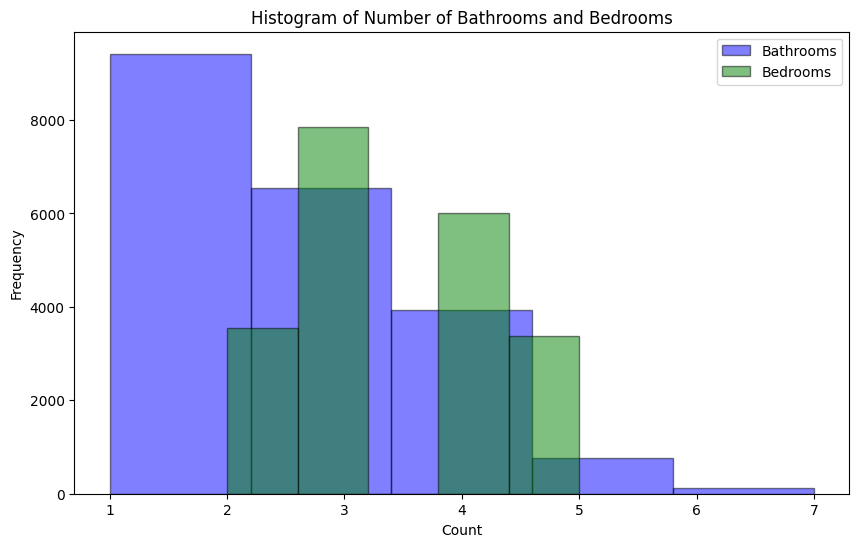

In [ ]:
# Membuat histogram dengan overlay
plt.figure(figsize=(10, 6))

# Histogram untuk jumlah kamar mandi
plt.hist(data_filtered['bath'], bins=5, alpha=0.5, label='Bathrooms', color='blue', edgecolor='black')

# Histogram untuk jumlah kamar tidur
plt.hist(data_filtered['bed'], bins=5, alpha=0.5, label='Bedrooms', color='green', edgecolor='black')

# Menambahkan label dan judul
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bathrooms and Bedrooms')
plt.legend()

plt.show()

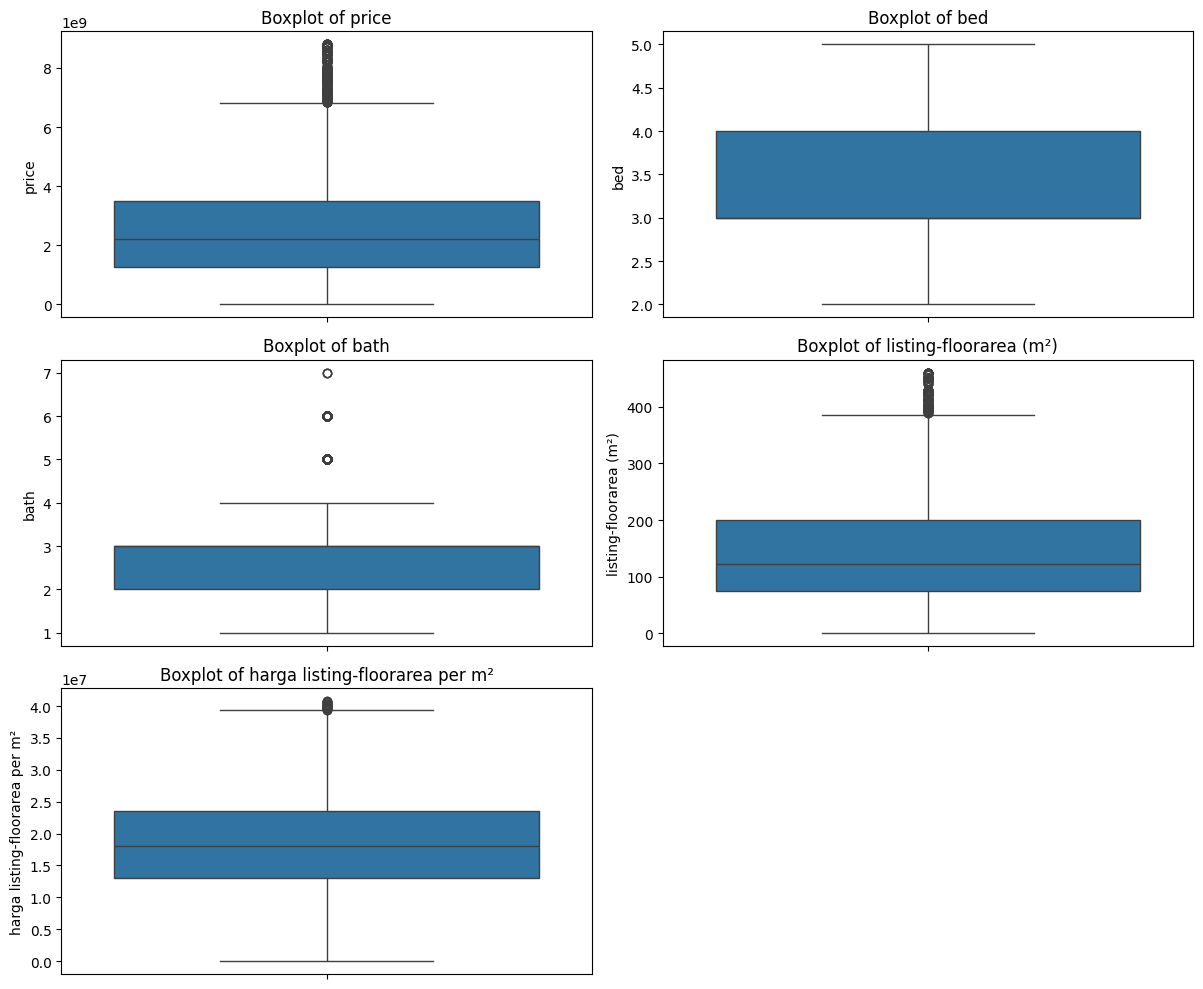

In [ ]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(data_filtered.columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data_filtered[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

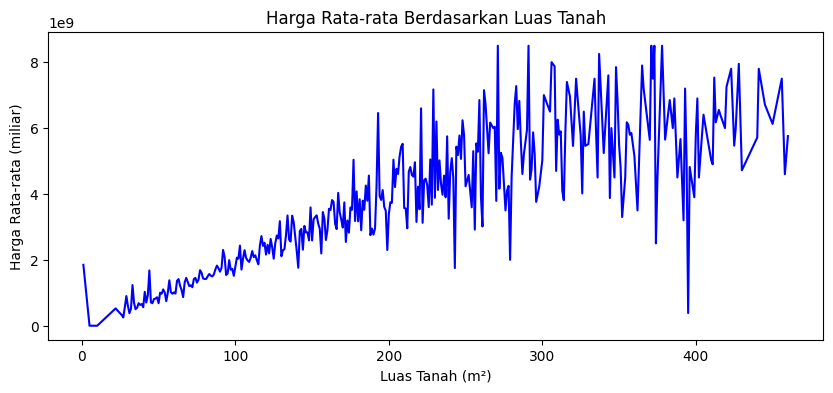

In [ ]:
# Menambahkan garis yang menunjukkan harga rata-rata untuk setiap luas tanah
average_prices = data_filtered.groupby('listing-floorarea (m²)')['price'].mean()
plt.figure(figsize=(10, 4))
plt.plot(average_prices.index, average_prices.values, color='blue', linestyle='-', linewidth=1.5)
plt.ylabel('Harga Rata-rata (miliar)')
plt.xlabel('Luas Tanah (m²)')
plt.title('Harga Rata-rata Berdasarkan Luas Tanah')

plt.show()

## **6. Korelasi**

In [ ]:
data_filtered.sample(5)

,price,bed,bath,listing-floorarea (m²),harga listing-floorarea per m²
9074,9.000000e+08,3.0,2.0,85.0,11250000.0
26209,2.300000e+09,4.0,3.0,110.0,27380952.0
28255,2.700000e+09,5.0,4.0,176.0,20454545.0
7026,1.250000e+09,3.0,2.0,80.0,10869565.0
13099,5.000000e+08,2.0,1.0,36.0,7936508.0


In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20795 entries, 0 to 29419
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           20795 non-null  float64
 1   bed                             20795 non-null  float64
 2   bath                            20795 non-null  float64
 3   listing-floorarea (m²)          20795 non-null  float64
 4   harga listing-floorarea per m²  20795 non-null  float64
dtypes: float64(5)
memory usage: 974.8 KB


In [ ]:
# Menghitung nilai korelasi
correlation_matrix = data_filtered.corr()
print("Nilai Korelasi:\n", correlation_matrix)

Nilai Korelasi:
                                    price       bed      bath  \
price                           1.000000  0.596875  0.626702   
bed                             0.596875  1.000000  0.766175   
bath                            0.626702  0.766175  1.000000   
listing-floorarea (m²)          0.808187  0.665355  0.665274   
harga listing-floorarea per m²  0.547514  0.310949  0.417863   

                                listing-floorarea (m²)  \
price                                         0.808187   
bed                                           0.665355   
bath                                          0.665274   
listing-floorarea (m²)                        1.000000   
harga listing-floorarea per m²                0.297166   

                                harga listing-floorarea per m²  
price                                                 0.547514  
bed                                                   0.310949  
bath                                                  

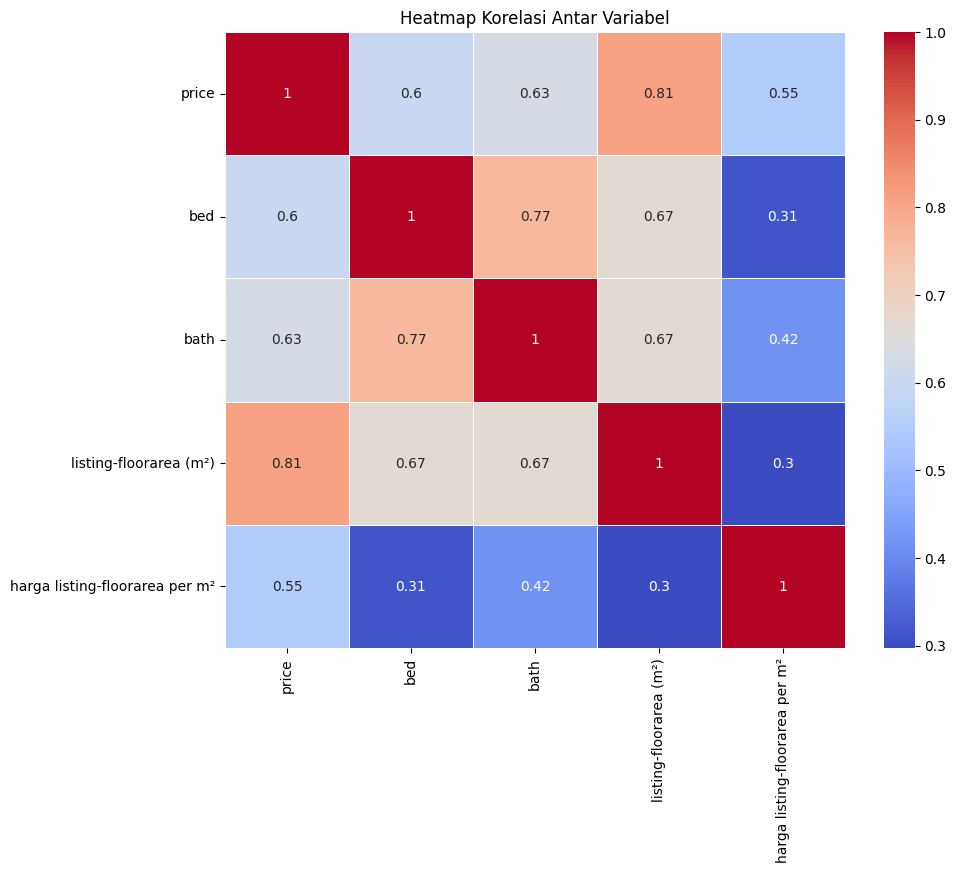

In [ ]:
# Membuat visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

## **7. Modeling (Linear Regression)**

In [ ]:
# Pisahkan fitur dan target
X = data_filtered[['bed', 'bath', 'listing-floorarea (m²)', 'harga listing-floorarea per m²']]
y = data_filtered['price']

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
# Menampilkan bentuk dari setiap subset data
print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)


Bentuk X_train: (16636, 4)
Bentuk X_test: (4159, 4)
Bentuk y_train: (16636,)
Bentuk y_test: (4159,)


In [ ]:
# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model dengan data training yang telah distandarisasi
model.fit(X_train_scaled, y_train)

# Nilai konstanta (intercept) dan koefisien regresi
a = model.intercept_
b = model.coef_

print("Constanta (a):", a)
print("Koefisien regresi (b):", b)

Constanta (a): 2601235003.8757515
Koefisien regresi (b): [5.24982678e+07 2.53100556e+07 1.21519039e+09 5.96469527e+08]


Nilai Konstanta(a) = 2601235003.8757515

Nilai koefisien (b1)= 5.24982678e+07, (b2) = 2.53100556e+07 , (b3) = 1.21519039e+09, (b4) = 5.96469527e+08

Sehingga model regresi yang didapat adalah

==> Y = 2601235003.8757515 +  5.24982678e+07.X1 + 2.53100556e+07.X2 + 1.21519039e+09.X3 + 5.96469527e+08.X4


In [ ]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

# Define the hyperparameters and their values
param_grid = {
    'poly__degree': [5, 6, 7, 8, 9, 10],  # Polynomial degrees to test
    'regressor__copy_X': [True, False],
    'regressor__fit_intercept': [True, False],
    'regressor__n_jobs': [1, 5, 10, 15, None],
    'regressor__positive': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

# Evaluate the model
print("Test set score: ", best_model.score(X_test, y_test))

Best parameters found:  {'poly__degree': 5, 'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__n_jobs': 1, 'regressor__positive': False}
Test set score:  0.7818959826321377


In [ ]:
# prompt: check best_model r squared dan rmse

import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate R^2 score
r2_score_model = r2_score(y_test, y_pred)

# Calculate RMSE
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("R^2 score:", r2_score_model)
print("RMSE:", rmse_model)


R^2 score: 0.7818959826321377
RMSE: 836107974.8820546


## **8. Visualisasi Grafik Linear**

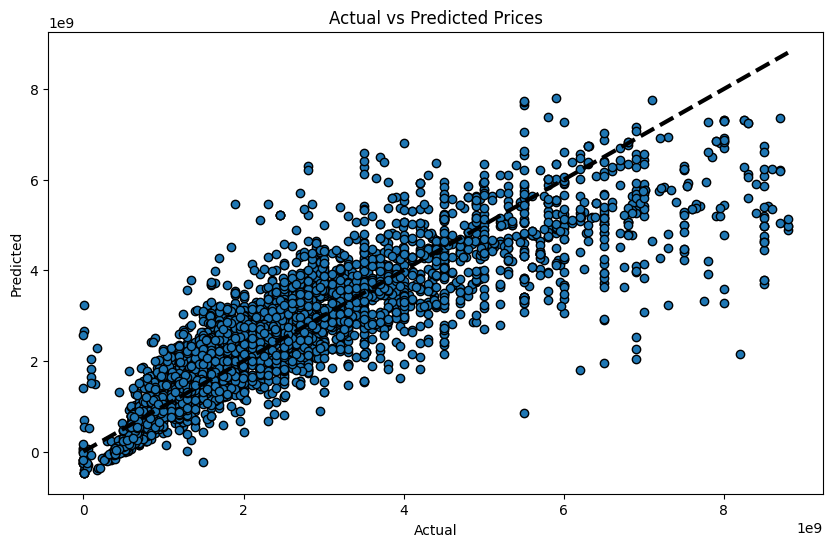

In [ ]:
# Prediksi nilai harga berdasarkan data testing yang telah distandarisasi
y_pred = model.predict(X_test_scaled)

# Visualisasi data actual vs prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

## **9. Evaluasi (Nilai Data Actual dan Nilai Data Prediksi)**

In [ ]:
# Tampilkan nilai data actual dan prediksi dalam bentuk tabel
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result)

             Actual     Predicted
6853   1.900000e+09  2.792272e+09
13585  9.000000e+08  7.548711e+08
27621  3.600000e+09  3.475027e+09
21944  9.425000e+08  4.998986e+08
7051   1.647660e+09  2.935584e+09
...             ...           ...
6444   1.550000e+09  1.383791e+09
4016   1.550000e+09  1.069385e+09
20886  2.390000e+09  2.696683e+09
6183   3.400000e+09  5.060268e+09
9902   6.670000e+08  5.432415e+08

[4159 rows x 2 columns]


## **10.  Uji Akurasi Model Linear Regression**

In [ ]:
importance = model.coef_
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {importance[i]}")


bed: 52498267.83511773
bath: 25310055.561558962
listing-floorarea (m²): 1215190389.8644204
harga listing-floorarea per m²: 596469526.5334013


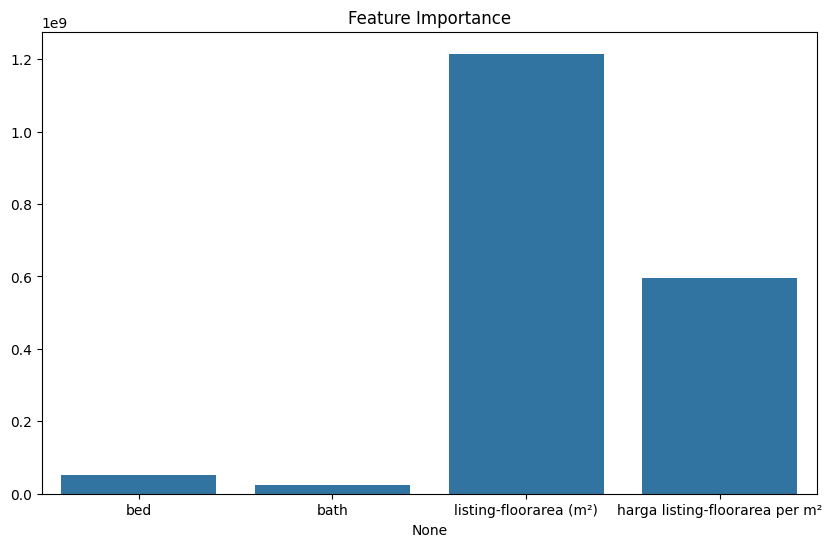

                          Feature    Importance
2          listing-floorarea (m²)  1.215190e+09
3  harga listing-floorarea per m²  5.964695e+08
0                             bed  5.249827e+07
1                            bath  2.531006e+07


In [ ]:
# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=X_train.columns, y=importance)
plt.title('Feature Importance')
plt.show()

# Ranking feature importance
importance_ranking = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print(importance_ranking)


Berdasarkan analisis kepentingan fitur, luas area rumah (listing-floorarea) dan harga per meter persegi (harga listing-floorarea per m²) menonjol sebagai faktor terpenting yang mempengaruhi prediksi harga rumah, dengan nilai kepentingan masing-masing sekitar 1.215190e+09 dan 5.964695e+08. Fitur jumlah kamar tidur (bed) dan jumlah kamar mandi (bath) juga memberikan kontribusi yang signifikan, meskipun dalam tingkat kepentingan yang lebih rendah dengan nilai masing-masing sekitar 5.249827e+07 dan 2.531006e+07. Analisis ini menunjukkan bahwa luas area dan harga per meter persegi adalah faktor yang paling berpengaruh dalam variasi harga rumah, dengan jumlah kamar tidur dan kamar mandi juga berperan penting dalam penentuan harga rumah.

In [ ]:
# Hitung metrik evaluasi
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r_squared)
print("RMSE:", rmse)

R-squared: 0.752401148695255
RMSE: 890850536.7124379


Hasil analisis menunjukkan bahwa model yang digunakan memiliki tingkat kemampuan yang cukup baik dalam menjelaskan variasi harga rumah, dengan nilai R-squared sebesar 0.75, yang berarti sekitar 75.24% dari variabilitas harga rumah dapat dijelaskan oleh model. Namun, nilai RMSE yang cukup besar sebesar 890,850,537 menandakan bahwa terdapat nilai selisih yang signifikan dalam satuan harga rumah.

RMSE sebesar 890,850,536 dalam konteks harga rumah maksimum sebesar 8,800,000,000 menunjukkan bahwa kesalahan prediksi rata-rata sekitar 10% dari harga maksimum yang mungkin. Ini bisa dianggap sebagai kesalahan yang relatif kecil dalam konteks nilai yang sangat besar seperti ini.

In [ ]:
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
area = float(input("Enter the area in square meters: "))
price_per_meter = float(input("Enter the price per square meter: "))

# Create a list of features
features = [bedrooms, bathrooms, area, price_per_meter]

# Convert the list to a NumPy array
features_array = np.array(features).reshape(1, -1)

# Predict the price using the model
predicted_price = model.predict(features_array)[0]

# Print the predicted price
print(f"Predicted price: Rp. {predicted_price:.2f}")


Enter the number of bedrooms: 2
Enter the number of bathrooms: 2
Enter the area in square meters: 2
Enter the price per square meter: 2
Predicted price: Rp. 6380171483.46


## model alternatif (random forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Neural Networks": MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Model: {name}")
    print(f"R-squared: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print()


Model: Linear Regression
R-squared: 0.752
RMSE: 890850536.705
MAE: 619969300.679

Model: Random Forest Regressor
R-squared: 0.864
RMSE: 659406167.040
MAE: 340302686.259

Model: Gradient Boosting Regressor
R-squared: 0.798
RMSE: 803891631.677
MAE: 532366400.760

Model: Neural Networks
R-squared: 0.281
RMSE: 1517563193.447
MAE: 1126456984.233



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model RandomForestRegressor
model_rf = RandomForestRegressor()

# Latih model dengan data training
model_rf.fit(X_train, y_train)

# Prediksi nilai harga berdasarkan data testing
y_pred_rf = model_rf.predict(X_test)

# Hitung nilai R^2
r2_rf = r2_score(y_test, y_pred_rf)

# Print hasil
print("R^2 using RandomForestRegressor:", r2_rf)


R^2 using RandomForestRegressor: 0.8637107417025945


In [ ]:
# prompt: atur cari polynomial degrees pada model rf

import numpy as np
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regressor', RandomForestRegressor())
])

# Define the hyperparameters and their values
param_grid_rf = {
    'poly__degree': [1,2,3,4,5,6,7,8,9,10],  # Polynomial degrees to test
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 5, 10],
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search_rf.best_params_)

# Best estimator
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the model
print("Test set score: ", best_model_rf.score(X_test, y_test))

# Predict on test data
y_pred_rf = best_model_rf.predict(X_test)

# Calculate R^2 score
r2_score_model_rf = r2_score(y_test, y_pred_rf)

# Calculate RMSE
rmse_model_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print results
print("R^2 score:", r2_score_model_rf)
print("RMSE:", rmse_model_rf)


In [ ]:
# Hitung nilai RMSE model_rf
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print hasil
print("RMSE model_rf:", rmse_rf)


RMSE model_rf: 659200178.5225067


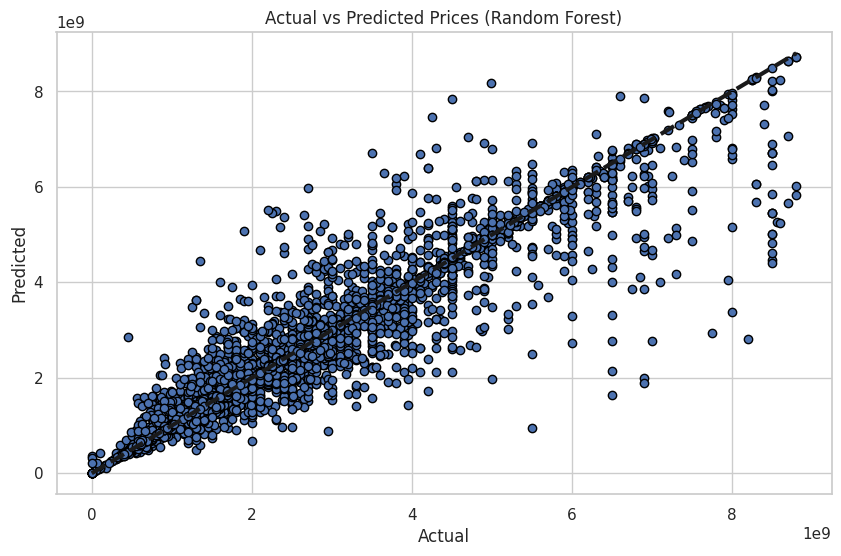

In [ ]:
# Prediksi nilai harga menggunakan model_rf
y_pred_rf = model_rf.predict(X_test)

# Visualisasi data actual vs prediksi menggunakan model_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()


In [ ]:
# prompt: uji prediksi model_rf user input

import numpy as np
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
area = float(input("Enter the area in square meters: "))
price_per_meter = float(input("Enter the price per square meter: "))

# Create a list of features
features = [bedrooms, bathrooms, area, price_per_meter]

# Convert the list to a NumPy array
features_array = np.array(features).reshape(1, -1)

# Predict the price using the model
predicted_price = model_rf.predict(features_array)[0]

# Print the predicted price
print(f"Predicted price: Rp. {predicted_price:.2f}")


Enter the number of bedrooms: 2
Enter the number of bathrooms: 2
Enter the area in square meters: 200
Enter the price per square meter: 20000000
Predicted price: Rp. 3130000000.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
